<a href="https://colab.research.google.com/github/RomMeltzer/DataSignalProcessing/blob/main/DataSignalProccessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Emotion Recognition System Using Machine Learning
## For course 52419 Data Signal Proccessing - HUJI
### Submitted by Jonathan Wiesenfeld, Rom Meltzer, Ben Maimoni

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This project introduces a real-time speech emotion recognition system aimed at enabling computers to understand emotional states expressed in continuous speech, facilitating personalized responses. The system achieves high accuracies in emotion classification and shows promise in enhancing online learning environments by customizing courses based on students' emotional responses, thereby optimizing learning performance.




In [ ]:
import os
import IPython.display as ipd
from IPython.display import Audio
import pandas as pd
import librosa
import librosa.display
import numpy as np
import seaborn as sns
from google.colab import drive


In [ ]:
Tess="/content/drive/MyDrive/TESS dataset"
tess_list = os.listdir(Tess)
tess_list.sort()



['OAF_back_angry.wav',
 'OAF_back_disgust.wav',
 'OAF_back_fear.wav',
 'OAF_back_happy.wav',
 'OAF_back_neutral.wav',
 'OAF_back_ps.wav',
 'OAF_back_sad.wav',
 'OAF_bar_angry.wav',
 'OAF_bar_disgust.wav',
 'OAF_bar_fear.wav',
 'OAF_bar_happy.wav',
 'OAF_bar_neutral.wav',
 'OAF_bar_ps.wav',
 'OAF_bar_sad.wav',
 'OAF_base_angry.wav',
 'OAF_base_disgust.wav',
 'OAF_base_fear.wav',
 'OAF_base_happy.wav',
 'OAF_base_neutral.wav',
 'OAF_base_ps.wav',
 'OAF_base_sad.wav',
 'OAF_bath_angry.wav',
 'OAF_bath_disgust.wav',
 'OAF_bath_fear.wav',
 'OAF_bath_happy.wav',
 'OAF_bath_neutral.wav',
 'OAF_bath_ps.wav',
 'OAF_bath_sad.wav',
 'OAF_bean_angry.wav',
 'OAF_bean_disgust.wav',
 'OAF_bean_fear.wav',
 'OAF_bean_happy.wav',
 'OAF_bean_neutral.wav',
 'OAF_bean_ps.wav',
 'OAF_bean_sad.wav',
 'OAF_beg_angry.wav',
 'OAF_beg_disgust.wav',
 'OAF_beg_fear.wav',
 'OAF_beg_happy.wav',
 'OAF_beg_neutral.wav',
 'OAF_beg_ps.wav',
 'OAF_beg_sad.wav',
 'OAF_bite_angry.wav',
 'OAF_bite_disgust.wav',
 'OAF_bite_f

In [ ]:
Crema ="/content/drive/MyDrive/crema d/AudioWAV"
crema_list = os.listdir(Crema)
crema_list.sort()


['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav',
 '1001_DFA_SAD_XX.wav',
 '1001_IEO_ANG_HI.wav',
 '1001_IEO_ANG_LO.wav',
 '1001_IEO_ANG_MD.wav',
 '1001_IEO_DIS_HI.wav',
 '1001_IEO_DIS_LO.wav',
 '1001_IEO_DIS_MD.wav',
 '1001_IEO_FEA_HI.wav',
 '1001_IEO_FEA_LO.wav',
 '1001_IEO_FEA_MD.wav',
 '1001_IEO_HAP_HI.wav',
 '1001_IEO_HAP_LO.wav',
 '1001_IEO_HAP_MD.wav',
 '1001_IEO_NEU_XX.wav',
 '1001_IEO_SAD_HI.wav',
 '1001_IEO_SAD_LO.wav',
 '1001_IEO_SAD_MD.wav',
 '1001_IOM_ANG_XX.wav',
 '1001_IOM_DIS_XX.wav',
 '1001_IOM_FEA_XX.wav',
 '1001_IOM_HAP_XX.wav',
 '1001_IOM_NEU_XX.wav',
 '1001_IOM_SAD_XX.wav',
 '1001_ITH_ANG_XX.wav',
 '1001_ITH_DIS_XX.wav',
 '1001_ITH_FEA_XX.wav',
 '1001_ITH_HAP_XX.wav',
 '1001_ITH_NEU_XX.wav',
 '1001_ITH_SAD_XX.wav',
 '1001_ITS_ANG_XX.wav',
 '1001_ITS_DIS_XX.wav',
 '1001_ITS_FEA_XX.wav',
 '1001_ITS_HAP_XX.wav',
 '1001_ITS_NEU_XX.wav',
 '1001_ITS_SAD_XX.wav',
 '1001_IWL_ANG_XX.wav',
 '1001_IWL_DIS_X

In [ ]:
base_folder = "/content/drive/MyDrive/ravdess"
ravdess_list = []

for subfolder in os.listdir(base_folder):
    subfolder_path = os.path.join(base_folder, subfolder)

    if os.path.isdir(subfolder_path):
        for file in os.listdir(subfolder_path):
            if file.endswith(".wav"):
                ravdess_list.append(file)

ravdess_list.sort()


In [ ]:
file_paths = []
emotion_labels = []

for file_name in tess_list:
    if 'angry' in file_name:
        emotion_labels.append('angry')
    elif 'disgust' in file_name:
        emotion_labels.append('disgust')
    elif 'fear' in file_name:
        emotion_labels.append('fear')
    elif 'happy' in file_name:
        emotion_labels.append('happy')
    elif 'neutral' in file_name:
        emotion_labels.append('neutral')
    elif 'ps' in file_name:
        emotion_labels.append('surprise')
    elif 'sad' in file_name:
        emotion_labels.append('sad')
    else:
        emotion_labels.append('Unknown')
    file_paths.append(os.path.join(Tess, file_name))

Main_Wav_Data = pd.DataFrame({'WAV': file_paths, 'EMOTION': emotion_labels})
Main_Wav_Data.head(5)


In [ ]:
file_paths1 = []
emotion_labels1 = []
for file_name in crema_list:
  if 'ANG' in file_name:
    emotion_labels1.append('angry')
  elif 'DIS' in file_name:
    emotion_labels1.append('disgust')
  elif 'FEA' in file_name:
    emotion_labels1.append("fear")
  elif 'HAP' in file_name:
    emotion_labels1.append('happy')
  elif 'NEU' in file_name:
    emotion_labels1.append('neutral')
  elif 'SAD' in file_name:
    emotion_labels1.append('sad')
  else:
        emotion_labels1.append('Unknown')
  file_paths1.append(os.path.join(Crema, file_name))
Main_Wav_Data1 = pd.DataFrame({'WAV': file_paths1, 'EMOTION': emotion_labels1})
Main_Wav_Data1.head(5)

In [ ]:
file_paths2 = []
emotion_labels2 = []
for subfolder in os.listdir(base_folder):
    subfolder_path = os.path.join(base_folder, subfolder)

    if os.path.isdir(subfolder_path):
        for file_name in os.listdir(subfolder_path):
            if file_name.endswith(".wav"):
                if '5' in file_name:
                    emotion_labels2.append('angry')
                elif '7' in file_name:
                    emotion_labels2.append('disgust')
                elif '6' in file_name:
                    emotion_labels2.append("fear")
                elif '3' in file_name:
                    emotion_labels2.append('happy')
                elif '1' in file_name:
                    emotion_labels2.append('neutral')
                elif '4' in file_name:
                    emotion_labels2.append('sad')
                elif '3' in file_name:
                    emotion_labels2.append('calm')
                elif '8' in file_name:
                    emotion_labels2.append('surprise')
                else:
                    emotion_labels2.append('Unknown')
                file_paths2.append(os.path.join(subfolder_path, file_name))

Main_Wav_Data2 = pd.DataFrame({'WAV': file_paths2, 'EMOTION': emotion_labels2})
Main_Wav_Data2.head(5)

,WAV,EMOTION
0,/content/drive/MyDrive/ravdess/Actor_05/03-01-...,angry
1,/content/drive/MyDrive/ravdess/Actor_05/03-01-...,angry
2,/content/drive/MyDrive/ravdess/Actor_05/03-01-...,angry
3,/content/drive/MyDrive/ravdess/Actor_05/03-01-...,angry
4,/content/drive/MyDrive/ravdess/Actor_05/03-01-...,angry


In [ ]:

Main_data = pd.concat([Main_Wav_Data, Main_Wav_Data1, Main_Wav_Data2], ignore_index=True)

Main_data['EMOTION'].value_counts()


EMOTION
happy       2319
angry       1967
disgust     1935
fear        1903
sad         1671
neutral     1487
surprise     400
Name: count, dtype: int64

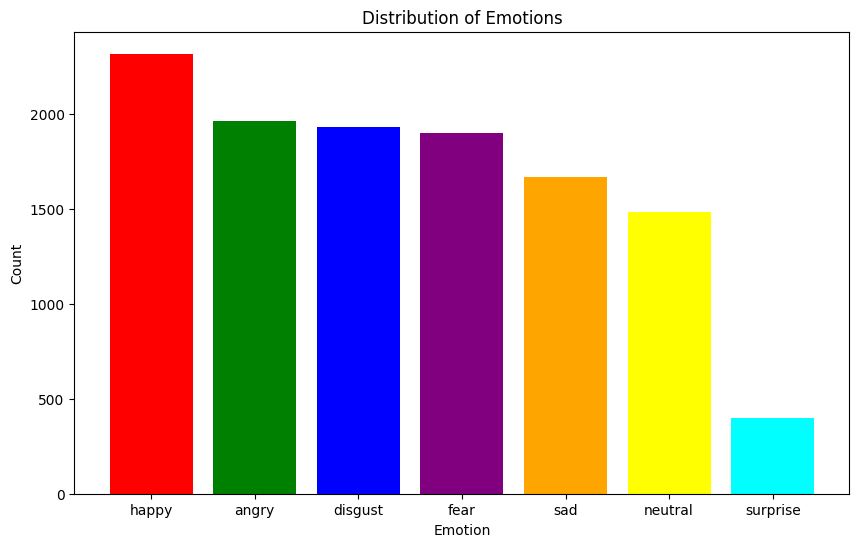

In [ ]:
import matplotlib.pyplot as plt
emotion_counts = Main_data['EMOTION'].value_counts()
emotions = emotion_counts.index
counts = emotion_counts.values

colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'cyan']
plt.figure(figsize=(10, 6))
plt.bar(emotions, counts, color=colors)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.show()

plotting waveplots and spectograms for audio signals
Waveplots - Waveplots let us know the loudness of the audio at a given time.
Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or
other signals as they vary with time. It’s a representation of frequencies changing with respect to time
for given audio/music signals.

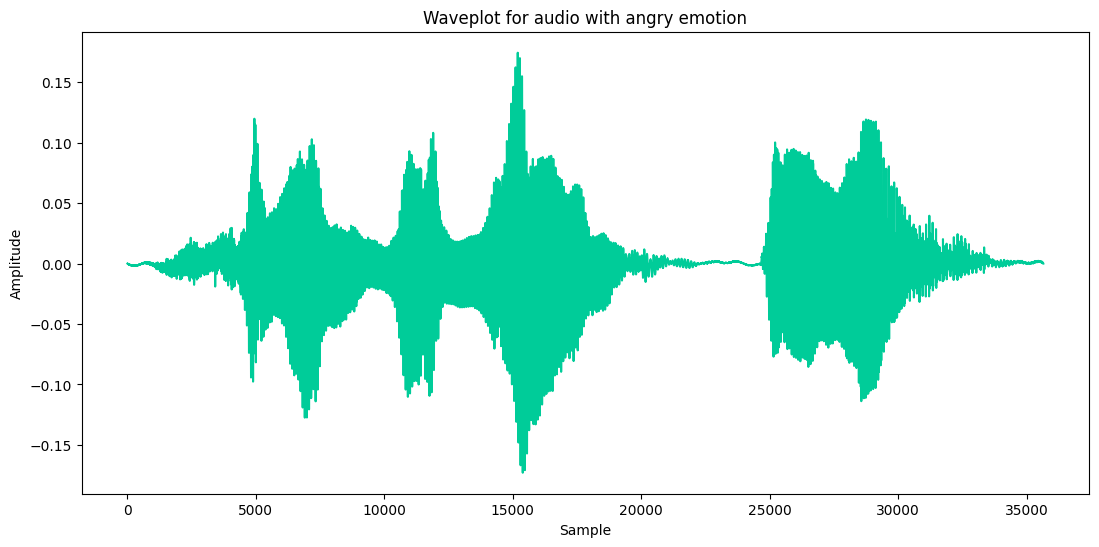

In [ ]:
figure = plt.figure(figsize=(13, 6))
audio_speech, rate = librosa.load(Main_data['WAV'][7])
plt.plot(audio_speech, color='#00cc99')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveplot for audio with angry emotion')
plt.show()

Audio(audio_speech, rate=rate)

Text(0.5, 1.0, 'Spectrogram of happy Speech')

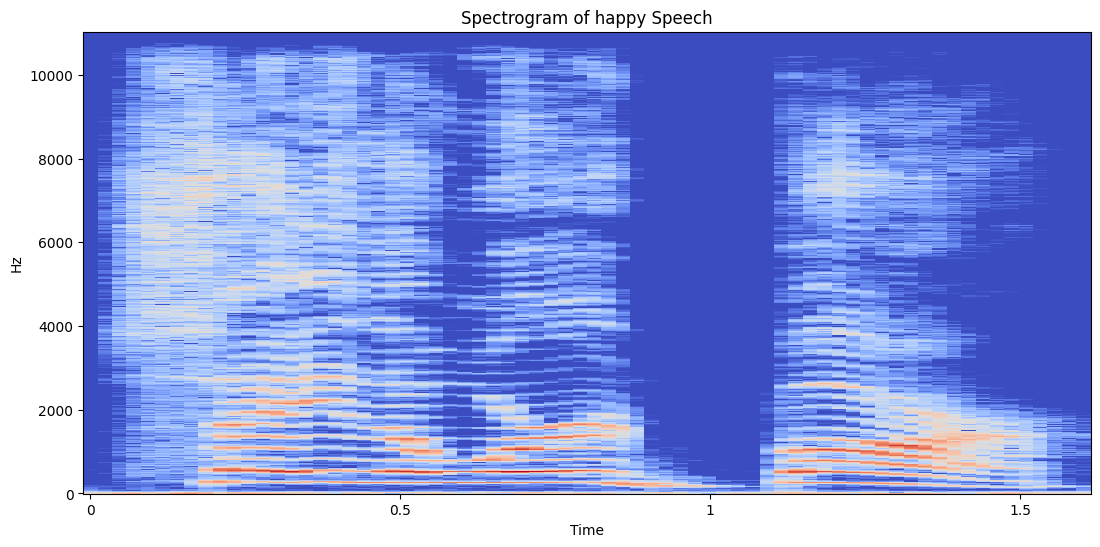

In [ ]:
figure = plt.figure(figsize=(13,6))

audio_speech,rate = librosa.load(Main_data['WAV'][7])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio, sr=rate, x_axis='time', y_axis='hz')
Audio(audio_speech, rate=rate)
plt.title('Spectrogram of happy Speech')

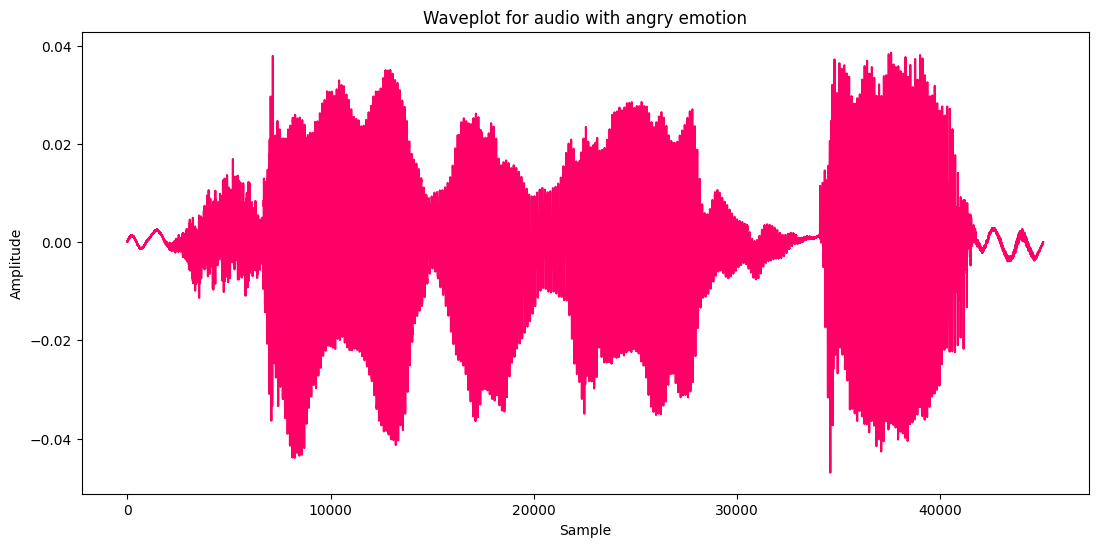

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

figure = plt.figure(figsize=(13, 6))
audio_speech, rate = librosa.load(Main_Wav_Data['WAV'][4])
plt.plot(audio_speech, color='#ff0066')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveplot for audio with angry emotion')
plt.show()

from IPython.display import Audio
Audio(audio_speech, rate=rate)

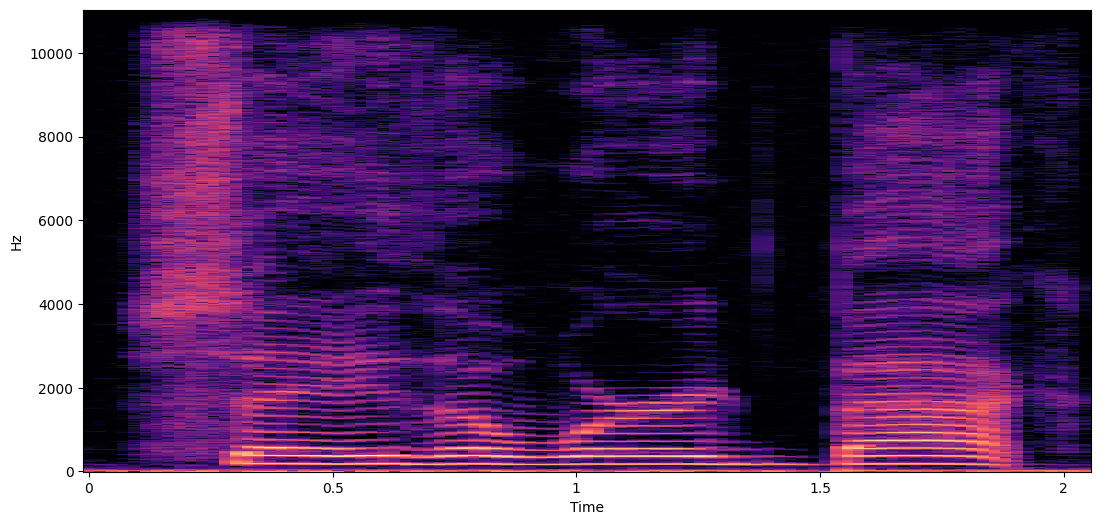

In [ ]:
figure = plt.figure(figsize=(13,6))

audio_speech,rate = librosa.load(Main_Wav_Data['WAV'][4])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio, sr=rate, x_axis='time', y_axis='hz')
Audio(audio_speech, rate=rate)

In [ ]:
from sklearn.utils import shuffle

Main_data = shuffle(Main_data, random_state=42)

In [ ]:
mfcc_features = []

for index, row in Main_data.iterrows():
    audio_file_path = row['WAV']
    audio_signal, sr = librosa.load(audio_file_path)

    mfcc = librosa.feature.mfcc(y=audio_signal, sr=sr, n_mfcc=40)
    mfcc_mean = np.mean(mfcc, axis=1)

    emotion_label = row['EMOTION']
    mfcc_features.append(np.append(mfcc_mean, emotion_label))
columns = [f'mfcc_{i}' for i in range(40)] + ['EMOTION']
mfcc_features_df = pd.DataFrame(mfcc_features, columns=columns)

split to train and test

In [ ]:
from sklearn.model_selection import train_test_split

mfcc_train, mfcc_rem, emotions_train, emotions_rem = train_test_split(
    mfcc_features_df.iloc[:, :-1], mfcc_features_df['EMOTION'],
    test_size=0.40, random_state=42)

mfcc_test, mfcc_validation, emotions_test, emotions_validation = train_test_split(
    mfcc_rem, emotions_rem,
    test_size=0.50, random_state=42)

mfcc_train_input = mfcc_train.to_numpy().reshape(mfcc_train.shape[0], mfcc_train.shape[1], 1)
mfcc_test_input = mfcc_test.to_numpy().reshape(mfcc_test.shape[0], mfcc_test.shape[1], 1)
mfcc_validation_input = mfcc_validation.to_numpy().reshape(mfcc_validation.shape[0], mfcc_validation.shape[1], 1)


In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelEncoder
model = Sequential()
model.add(Conv1D(64, 5,padding='same',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07)



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 10, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [ ]:
mfcc_train_input = mfcc_train_input.astype(np.float32)
mfcc_test_input = mfcc_test_input.astype(np.float32)
mfcc_validation_input = mfcc_validation_input.astype(np.float32)
emotions_mapping = {'sad': 0, 'happy': 1, 'angry': 2, 'neutral': 3, 'disgust': 4, 'fear': 5, 'surprise': 6}
emotions_train_numeric = [emotions_mapping[label] for label in emotions_train]
emotions_test_numeric = [emotions_mapping[label] for label in emotions_test]
emotions_validation_numeric = [emotions_mapping[label] for label in emotions_validation]
label_encoder = LabelEncoder()
emotions_train_encoded = label_encoder.fit_transform(emotions_train_numeric)
emotions_test_encoded = label_encoder.transform(emotions_test_numeric)
emotions_validation_encoded = label_encoder.transform(emotions_validation_numeric)

cnnhistory = model.fit(mfcc_train_input, emotions_train_encoded, batch_size=16, epochs=200, validation_data=(mfcc_validation_input, emotions_validation_encoded))


Epoch 1/200
439/439 [==============================] - 9s 18ms/step - loss: 2.8321 - accuracy: 0.2211 - val_loss: 2.0156 - val_accuracy: 0.2285
Epoch 2/200
439/439 [==============================] - 6s 14ms/step - loss: 1.8214 - accuracy: 0.3203 - val_loss: 1.5020 - val_accuracy: 0.3855
Epoch 3/200
439/439 [==============================] - 8s 18ms/step - loss: 1.6001 - accuracy: 0.3634 - val_loss: 1.4174 - val_accuracy: 0.4531
Epoch 4/200
439/439 [==============================] - 6s 13ms/step - loss: 1.4907 - accuracy: 0.4055 - val_loss: 1.3751 - val_accuracy: 0.4630
Epoch 5/200
439/439 [==============================] - 8s 19ms/step - loss: 1.4355 - accuracy: 0.4200 - val_loss: 1.3179 - val_accuracy: 0.4664
Epoch 6/200
439/439 [==============================] - 10s 22ms/step - loss: 1.3887 - accuracy: 0.4430 - val_loss: 1.2687 - val_accuracy: 0.5083
Epoch 7/200
439/439 [==============================] - 7s 17ms/step - loss: 1.3454 - accuracy: 0.4459 - val_loss: 1.2665 - val_accuracy

plot train and test accuracy

# Evalutation

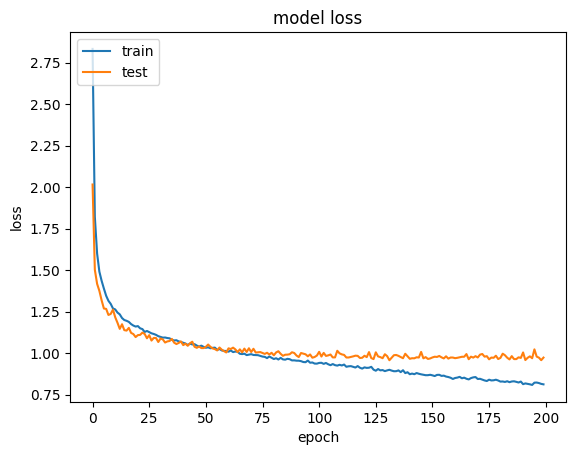

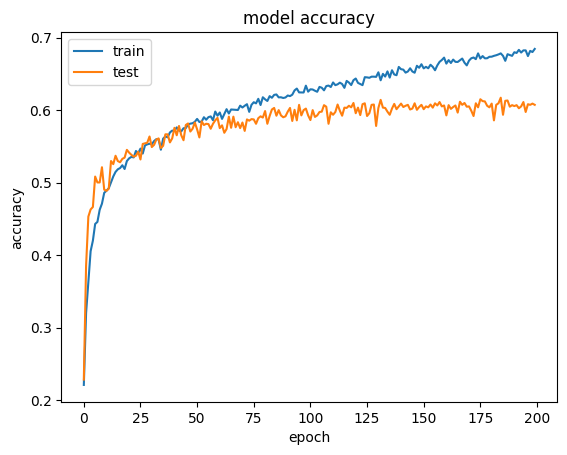

In [ ]:
acc      = cnnhistory.history['accuracy']
val_acc  = cnnhistory.history['val_accuracy']
loss     = cnnhistory.history['loss']
val_loss = cnnhistory.history['val_loss']

epochs   = range(len(acc))
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()


In [ ]:
results = model.evaluate(mfcc_test_input, emotions_test_encoded)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

73/73 [==============================] - 1s 7ms/step - loss: 1.0360 - accuracy: 0.6045
Test loss: 1.036030650138855
Test accuracy: 0.6044520735740662


In [ ]:
mfcc_test = mfcc_test.astype(np.float32)
predictions = np.argmax(model.predict(mfcc_test), axis=1)

73/73 [==============================] - 1s 5ms/step


# Confusion Matrix

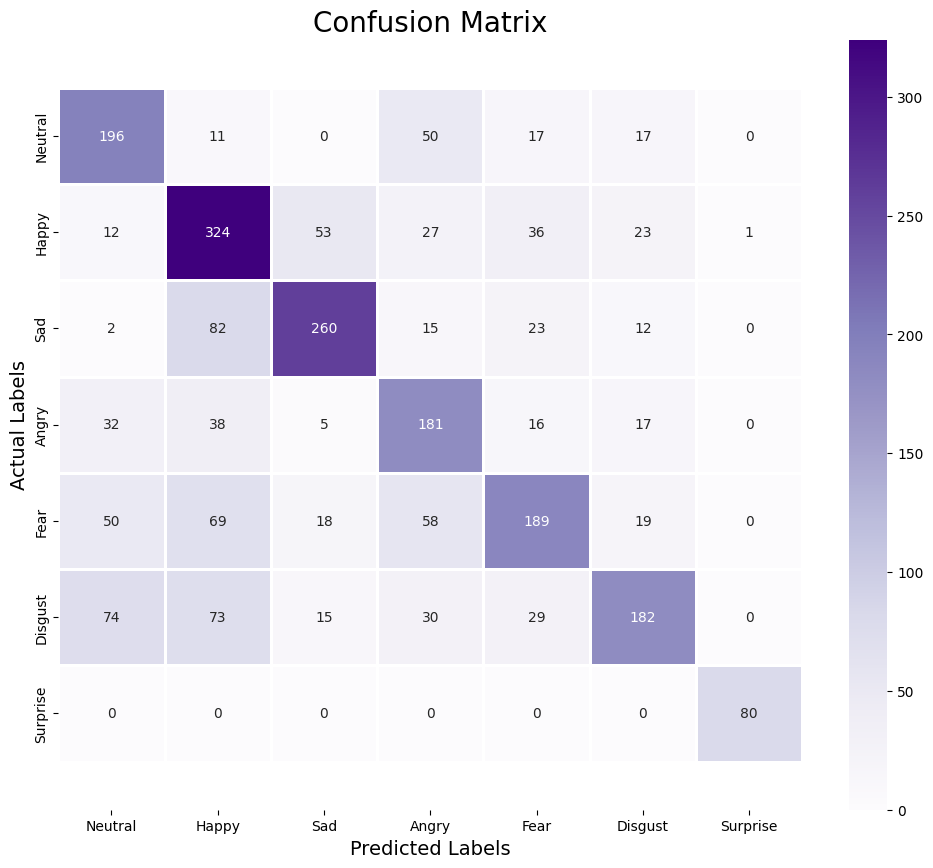

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

new_Ytest = emotions_test_encoded.astype(int)
matrix = confusion_matrix(new_Ytest, predictions)

plt.figure(figsize = (12, 10))
matrix = pd.DataFrame(matrix , index = ["Neutral","Happy","Sad","Angry","Fear","Disgust","Surprise"] , columns = ["Neutral","Happy","Sad","Angry","Fear","Disgust","Surprise"])
ax = sns.heatmap(matrix, linecolor='white', cmap='Purples', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.67      0.60       291
           1       0.54      0.68      0.60       476
           2       0.74      0.66      0.70       394
           3       0.50      0.63      0.56       289
           4       0.61      0.47      0.53       403
           5       0.67      0.45      0.54       403
           6       0.99      1.00      0.99        80

    accuracy                           0.60      2336
   macro avg       0.66      0.65      0.65      2336
weighted avg       0.62      0.60      0.60      2336



Bootstrap

In [ ]:
#Boot strap
import numpy as np

n_bootstrap = 100

bootstrap_loss = []
bootstrap_accuracy = []

for i in range(n_bootstrap):
    bootstrap_indices = np.random.choice(range(len(mfcc_test_input)), len(mfcc_test_input), replace=True)

    bootstrap_test_input = mfcc_test_input[bootstrap_indices]
    bootstrap_emotions_test_encoded = emotions_test_encoded[bootstrap_indices]

    bootstrap_history = model.fit(bootstrap_test_input, bootstrap_emotions_test_encoded, batch_size=16, epochs=200, verbose=0)

    results = model.evaluate(mfcc_test_input, emotions_test_encoded, verbose=0)

    bootstrap_loss.append(results[0])
    bootstrap_accuracy.append(results[1])

mean_loss = np.mean(bootstrap_loss)
std_loss = np.std(bootstrap_loss)
mean_accuracy = np.mean(bootstrap_accuracy)
std_accuracy = np.std(bootstrap_accuracy)

print("Mean Test Loss:", mean_loss)
print("Standard Deviation Test Loss:", std_loss)
print("Mean Test Accuracy:", mean_accuracy)
print("Standard Deviation Test Accuracy:", std_accuracy)


Evaluate our model on a new dataset

In [ ]:
#Savee dataset
import os
import pandas as pd

Savee = "/content/drive/MyDrive/Savee"
savee_list = os.listdir(Savee)
savee_list.sort()

file_paths = []
emotion_labels = []

emotion_dict = {
    'a': 'anger',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happiness',
    'n': 'neutral',
    'sa': 'sadness',
    'su': 'surprise'
}

for file_name in savee_list:

    prefix = file_name.split('_')[1][0]
    if len(prefix) == 1 and prefix in emotion_dict:
        emotion_labels.append(emotion_dict[prefix])
    elif prefix.startswith('sa'):
        emotion_labels.append(emotion_dict['sa'])
    elif prefix.startswith('su'):
        emotion_labels.append(emotion_dict['su'])
    else:
        emotion_labels.append('Unknown')

    file_paths.append(os.path.join(Savee, file_name))


Savee = pd.DataFrame({'WAV': file_paths, 'EMOTION': emotion_labels})
mfcc_features = []

for index, row in Savee.iterrows():
    audio_file_path = row['WAV']
    audio_signal, sr = librosa.load(audio_file_path)

    mfcc = librosa.feature.mfcc(y=audio_signal, sr=sr, n_mfcc=40)
    mfcc_mean = np.mean(mfcc, axis=1)

    emotion_label = row['EMOTION']
    mfcc_features.append(np.append(mfcc_mean, emotion_label))
columns = [f'mfcc_{i}' for i in range(40)] + ['EMOTION']
mfcc_features_savee_df = pd.DataFrame(mfcc_features, columns=columns)
features_savee = np.array(mfcc_features_savee_df.iloc[:, :-1]).astype(np.float32)
features_savee = features_savee.reshape(features_savee.shape[0], features_savee.shape[1], 1)
labels_savee = LabelEncoder().fit_transform(mfcc_features_savee_df['EMOTION'])


predictions = model.predict(features_savee)
predicted_classes = np.argmax(predictions, axis=1)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_savee, predicted_classes)
print(f'Accuracy on SAVEE dataset: {accuracy:.2f}')

15/15 [==============================] - 0s 4ms/step
Accuracy on SAVEE dataset: 0.12


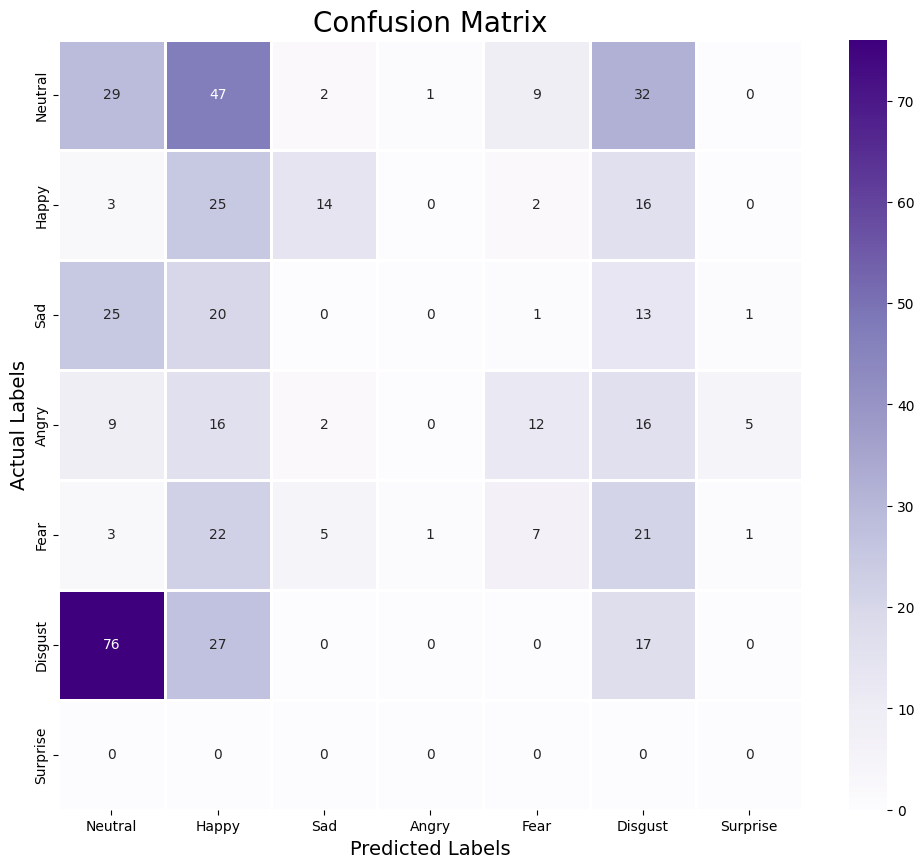

              precision    recall  f1-score   support

     Neutral       0.20      0.24      0.22       120
       Happy       0.16      0.42      0.23        60
         Sad       0.00      0.00      0.00        60
       Angry       0.00      0.00      0.00        60
        Fear       0.23      0.12      0.15        60
     Disgust       0.15      0.14      0.14       120
    Surprise       0.00      0.00      0.00         0

    accuracy                           0.16       480
   macro avg       0.10      0.13      0.11       480
weighted avg       0.14      0.16      0.14       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

matrix = confusion_matrix(labels_savee, predicted_classes)

plt.figure(figsize=(12, 10))
df_cm = pd.DataFrame(matrix, index=["Neutral", "Happy", "Sad", "Angry", "Fear", "Disgust", "Surprise"],
                     columns=["Neutral", "Happy", "Sad", "Angry", "Fear", "Disgust", "Surprise"])
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Purples', linecolor='white', linewidth=1)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

report = classification_report(labels_savee, predicted_classes, target_names=["Neutral", "Happy", "Sad", "Angry", "Fear", "Disgust", "Surprise"])
print(report)
